# Assignment 1, Q2, Extragalactic Astronomy
Nasser Mohammed

Feburary 3rd, 2025

>The purpose of this question is to familiarize you with spectral synthesis modelling. Spectral synthesis is an essential tool needed to understand how galaxies evolve

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
plt.style.use('dark_background')

In [5]:
import os
os.environ["SPS_HOME"] = "/Users/nasserm/Documents/vscode/extragalactic/fsps"
from fsps import StellarPopulation as stp


>Assume that a local galaxy with a stellar mass of $10^{10.4}$ Msun was born at z=5.1, and has been forming
>stars with an exponentially declining star formation history with an e-folding timescale of 6 Gyr.

Key Values:
- Stellar Mass of Galaxy : $10^{10.4}$
- Born at z = 5.1
- e-folding timescale of 6 Gyr

## 2.1

> What is the current star-formation rate of the galaxy? What was its star-formation rate at z=3?

From (Conroy, Gunn, & White, 2009), equation 5,

$$\Psi(t) = \frac{1-C}{\tau} \frac{e^{-t/\tau}}{e^{-T_{\text{start}}/\tau} - e^{-T_{\text{univ}}/\tau}}+\frac{C}{T_{\text{univ}}-T_{\text{start}}},$$

gives us the star formation rate that commenced at some epoch $T_\text{start}$. C is the fraction of mass formed in a constant mode of star formation, and we will set this to 0 because we are modelling an exponentially declining star formation history. $\tau$ is the e-folding timescale, for this question it is 6 GYr. Because this is currently normalized such that 1 M $_{\odot}$ is formed by T $_\text{univ}$, we will multiply $\Psi(t)$ by $10^{10.4} \text{M}_{\odot}$.

In [17]:
def Psi_t(t, tau, T_start, T_univ):
    return 1/tau * np.exp(-t/tau)/(np.exp(-T_start/tau) - np.exp(-T_univ/tau))

In [26]:
from astropy.cosmology import WMAP9 as cosmo

T_start = cosmo.age(5.1).value
T_univ_today = cosmo.age(0).value
T_univ_z3 = cosmo.age(3).value
tau = 6

sfr_z0 = Psi_t(T_univ_today, tau, T_start, T_univ_today)
sfr_z3 = Psi_t(T_univ_z3, tau, T_start, T_univ_today)

print(f'the normalized star forming rate at z=0 is: {sfr_z0:.3e} solar masses per year')
print(f'the normalized star forming rate at z=3 is: {sfr_z3:.3e} solar masses per year')

the normalized star forming rate at z=0 is: 2.322e-02 solar masses per year
the normalized star forming rate at z=3 is: 1.603e-01 solar masses per year


In [65]:
sp = stp(compute_vega_mags=False, 
                            zcontinuous=0, #continuous star formation history, I want exponential. Burst is zcontinous = 0
                            sfh=1, 
                            tau=6,
                            sf_start=0,
                            logzsol=0.0, 
                            dust_type=2, 
                            dust2=0.2,
                            add_stellar_remnants=True,
                            tage=cosmo.age(0).value-cosmo.age(5.1).value)

In [ ]:
sp.sfr_avg(times=(cosmo.age(0).value-cosmo.age(5.1).value), dt=0.01)*10**10.4

np.float64(0.5838041571355057)

In [64]:
sp.stellar_mass

np.float64(0.43145474811894025)

In [79]:
cosmo.age(5.1).value

np.float64(1.1609400419573814)

# Explaining the Star Formation Rate Calculation

The exponential decline model for star formation rate (SFR) follows:

$$\Psi(t) = \frac{1}{\tau} \frac{e^{-t/\tau}}{e^{-T_{\text{start}}/\tau} - e^{-T_{\text{univ}}/\tau}}$$

where:
- $\tau$ is the e-folding timescale (6 Gyr in our case)
- $T_{\text{start}}$ is the cosmic time when star formation began (at z=5.1)
- $T_{\text{univ}}$ is the age of the universe at the time of observation
- $t$ is the time since the Big Bang at which we're calculating the SFR

To calculate the total stellar mass at any given time, we need to integrate the SFR over time, accounting for mass loss. The code implementation uses a numerical approach:

$$M(t-\Delta t) = M(t) - \text{SFR}(t) \cdot M(t) \cdot \Delta t$$

This recursive calculation tracks how the galaxy's mass evolves as it forms stars according to the exponential decline model, with the rate proportional to the current mass at each timestep.

In [106]:
import scipy.integrate
def past_mass(sf_rate, mass, dt):
    mass_new = (mass-sf_rate*mass*dt)
    return sf_rate*mass_new

mass_arr=[10**10.4]
sf_arrate = []
i=0
dt=-0.01
for t in np.arange(cosmo.age(0).value-cosmo.age(5.1).value, 0, dt):
    sp.params['tage'] = t
    print(t)
    mass_temp=mass_arr[i]-(sp.sfr*mass_arr[i])*(np.abs(dt)*10**7)
    mass_arr.append(mass_temp)
    sf_arrate.append(sp.sfr*mass_arr[i])
    i=i+1


12.60795907497194
12.597959074971941
12.587959074971941
12.577959074971941
12.567959074971942
12.557959074971942
12.547959074971942
12.537959074971942
12.527959074971942
12.517959074971943
12.507959074971943
12.497959074971943
12.487959074971943
12.477959074971944
12.467959074971944
12.457959074971944
12.447959074971944
12.437959074971944
12.427959074971945
12.417959074971945
12.407959074971945
12.397959074971945
12.387959074971945
12.377959074971946
12.367959074971946
12.357959074971946
12.347959074971946
12.337959074971947
12.327959074971947
12.317959074971947
12.307959074971947
12.297959074971947
12.287959074971948
12.277959074971948
12.267959074971948
12.257959074971948
12.247959074971948
12.237959074971949
12.227959074971949
12.217959074971949
12.20795907497195
12.19795907497195
12.18795907497195
12.17795907497195
12.16795907497195
12.15795907497195
12.14795907497195
12.13795907497195
12.127959074971951
12.117959074971951
12.107959074971951
12.097959074971952
12.087959074971952
12

Text(0.5, 1.0, 'Star Formation Rate vs. Redshift')

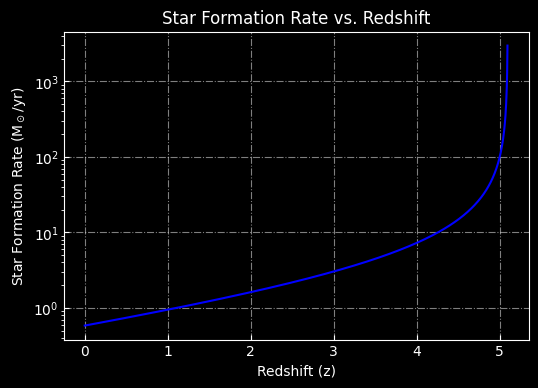

In [107]:
# Calculate star formation rate at each redshift in z_array
z_array = np.arange(0, 5.1, 0.004044409199048374)

# Plot star formation rate as a function of redshift
plt.figure(figsize=(6, 4))
plt.plot(z_array, sf_arrate, 'b-')
plt.xlabel('Redshift (z)')
plt.ylabel('Star Formation Rate (M$_\\odot$/yr)')
plt.grid(ls='-.', alpha=0.5)
#y axis log
plt.yscale('log')
plt.tick_params(direction='in')
plt.title('Star Formation Rate vs. Redshift')

In [108]:
#find the argument where z_array = 3
z3 = np.argmin(np.abs(z_array-3))
sf_arrate[z3]

np.float64(3.0338442493751803)

In [102]:
sf_arrate[0]

np.float64(0.5833177888113277)

In [103]:
mass_arr[-1]/10**10.4

np.float64(0.9300387433190269)

In [104]:
i

1261

In [85]:
mass_arr

[25118864315.09582,
 np.float64(25118858481.917934),
 np.float64(25118852637.65303),
 np.float64(25118846782.27745),
 np.float64(25118840915.76748),
 np.float64(25118835038.099335),
 np.float64(25118829149.24918),
 np.float64(25118823249.193115),
 np.float64(25118817337.907177),
 np.float64(25118811415.367344),
 np.float64(25118805481.54953),
 np.float64(25118799536.429592),
 np.float64(25118793579.983322),
 np.float64(25118787612.186447),
 np.float64(25118781633.01464),
 np.float64(25118775642.443504),
 np.float64(25118769640.44858),
 np.float64(25118763627.005352),
 np.float64(25118757602.08923),
 np.float64(25118751565.67557),
 np.float64(25118745517.73967),
 np.float64(25118739458.25675),
 np.float64(25118733387.201965),
 np.float64(25118727304.550426),
 np.float64(25118721210.27716),
 np.float64(25118715104.35714),
 np.float64(25118708986.765266),
 np.float64(25118702857.476383),
 np.float64(25118696716.465263),
 np.float64(25118690563.706615),
 np.float64(25118684399.175087),
 np

In [76]:
np.arange(cosmo.age(0).value, cosmo.age(5.1).value, -dt)

array([13.76889912, 13.75889912, 13.74889912, ...,  1.18889912,
        1.17889912,  1.16889912])

In [51]:
sp.formed_mass

np.float64(1.0)

In [35]:
print(f'The age of our galaxy today is {cosmo.age(0).value-cosmo.age(5.1).value:.4} Gyrs')

The age of our galaxy today is 12.61 Gyrs


In [23]:
g_band = ['sdss_g']

In [52]:
# Calculate the age of the universe at z=0 (now) and z=3
age_now = cosmo.age(0).value  # Age of the universe now in Gyr
age_at_z3 = cosmo.age(3).value  # Age of the universe at z=3 in Gyr
age_at_birth = cosmo.age(5.1).value  # Age of the universe when galaxy was born

# Calculate the age of the galaxy now and at z=3
galaxy_age_now = age_now - age_at_birth  # Galaxy's age now in Gyr
galaxy_age_at_z3 = age_at_z3 - age_at_birth  # Galaxy's age at z=3 in Gyr


# Get the current SFR at z=0 using the get_sfr method
sp.params['tau'] = 6  # Make sure tau is set to 6 Gyr
current_sfr = sp.sfr * (10**10.4)  # in M☉/yr

# Get the SFR at z=3
sp.params['sfh'] = 1  # Make sure we're using exponential decline model
# Store current age
current_age = sp.params['tage']
# Set the age to galaxy's age at z=3
sp.params['tage'] = galaxy_age_at_z3
# Get SFR at z=3
sfr_at_z3 = sp.sfr * (10**10.4)  # in M☉/yr
# Restore original age
sp.params['tage'] = current_age

print(f"Current star formation rate (z=0): {current_sfr:.2f} M☉/year")
print(f"Star formation rate at z=3: {sfr_at_z3:.2f} M☉/year")
print(f"Galaxy age at z=3: {galaxy_age_at_z3:.2f} Gyr")
print(f"Galaxy age now (z=0): {galaxy_age_now:.2f} Gyr")

Current star formation rate (z=0): 22.66 M☉/year
Star formation rate at z=3: 22.66 M☉/year
Galaxy age at z=3: 1.02 Gyr
Galaxy age now (z=0): 12.61 Gyr


## 2.2
> Plot the rest frame g-band magnitude of the galaxy as a function of redshift, from z=0.1 to z=5.

- Could mean that I want the magnitude as a function of red shift, aka moving a galaxy of age X from z=0.1 to z=5
- or, galaxy is age X at z=5, and it age Y at z=0.1, and it is forming stars throughout this time
    - the latter has more to do with star forming history, but the former is easier


In [53]:
z_array = np.linspace(0.1, 4.95, 500)

g_band_mag_z = np.asarray([-2.5*np.log10(10**10.4) + sp.get_mags(tage=cosmo.age(z).value-cosmo.age(5.1).value,
                                        redshift=z, 
                                        bands=g_band) for z in z_array])



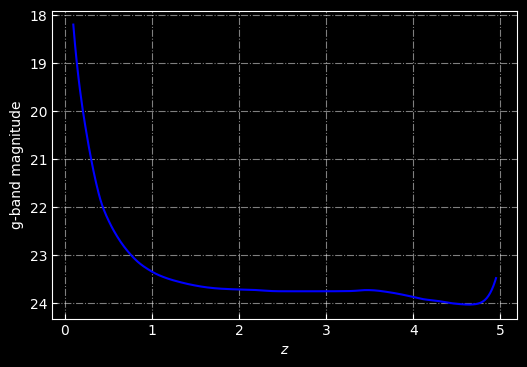

In [54]:
plt.figure(figsize=(6, 4))
plt.plot(z_array, g_band_mag_z, c='b')
plt.xlabel(r'$z$')
plt.ylabel(r'g-band magnitude')
plt.tick_params(direction='in')
plt.grid(ls = '-.', alpha=0.5)
plt.gca().invert_yaxis()


## 2.3
> Plot the rest frame (g-r) color of the galaxy as a function of redshift over range z=0.1 to z=5.


In [33]:

r_band = ['sdss_r']

r_band_mag_z = np.asarray([-2.5*np.log10(10**10.4) + sp.get_mags(tage=cosmo.age(z).value-cosmo.age(5.1).value,
                                        redshift=z, 
                                        bands=r_band) for z in z_array])



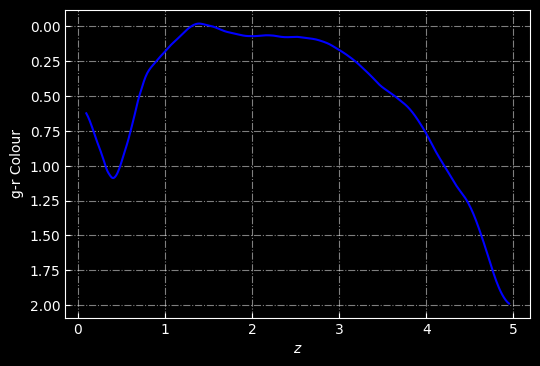

In [60]:
plt.figure(figsize=(6, 4))
plt.plot(z_array, g_band_mag_z-r_band_mag_z, c='b')
plt.xlabel(r'$z$')
plt.ylabel(r'g-r Colour')
plt.tick_params(direction='in')
plt.grid(ls = '-.', alpha=0.5)
plt.gca().invert_yaxis()


## 2.4

>  Repeat 1-3 above assuming the galaxy’s star-formation history had an e-folding timescale of 0.5 Gyr.